In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)


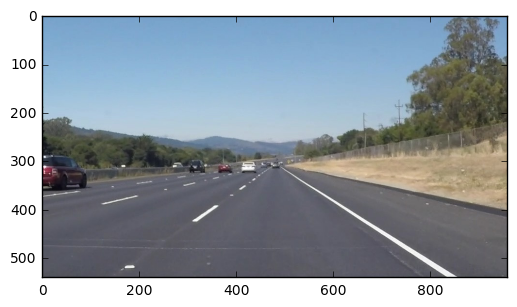

In [2]:
#reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')
#printing out some stats and plotting
print('This image is:', type(image), 'with dimesions:', image.shape)
plt.imshow(image)  #call as plt.imshow(gray, cmap='gray') to show a grayscaled image

In [3]:
import math

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)

In [4]:
import os
os.listdir("test_images/")

['out_out_solidWhiteCurve.jpg',
 'out_out_solidWhiteRight.jpg',
 'out_out_solidYellowCurve.jpg',
 'out_out_solidYellowCurve2.jpg',
 'out_out_solidYellowLeft.jpg',
 'out_out_whiteCarLaneSwitch.jpg',
 'out_solidWhiteCurve.jpg',
 'out_solidWhiteRight.jpg',
 'out_solidYellowCurve.jpg',
 'out_solidYellowCurve2.jpg',
 'out_solidYellowLeft.jpg',
 'out_whiteCarLaneSwitch.jpg',
 'solidWhiteCurve.jpg',
 'solidWhiteRight.jpg',
 'solidYellowCurve.jpg',
 'solidYellowCurve2.jpg',
 'solidYellowLeft.jpg',
 'whiteCarLaneSwitch.jpg']

File : out_out_solidWhiteCurve.jpg


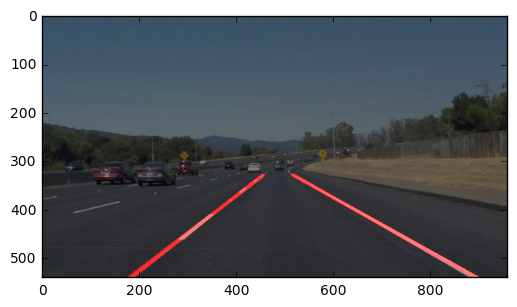

File : out_out_solidWhiteRight.jpg


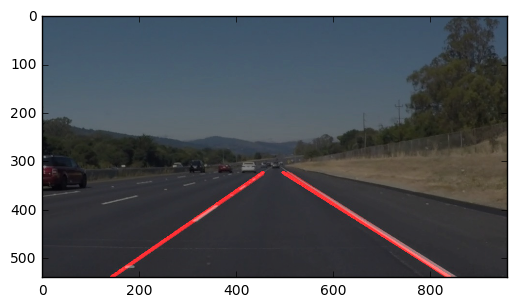

File : out_out_solidYellowCurve.jpg


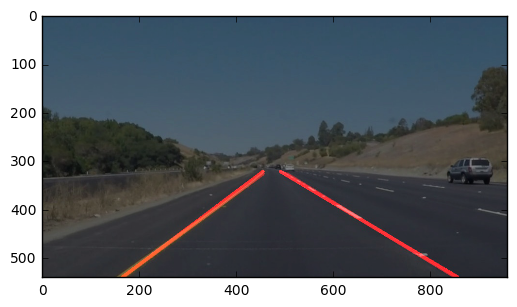

File : out_out_solidYellowCurve2.jpg


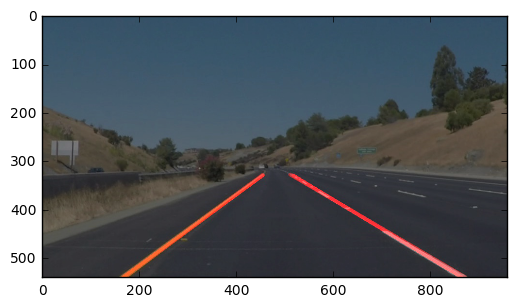

File : out_out_solidYellowLeft.jpg


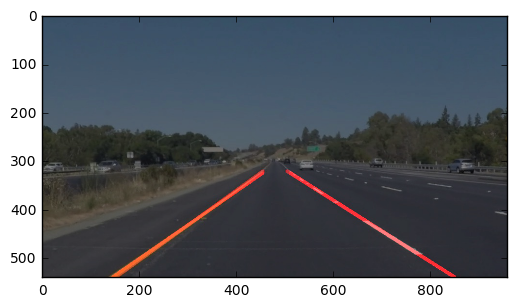

File : out_out_whiteCarLaneSwitch.jpg


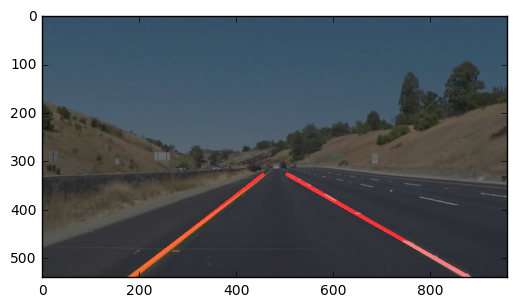

File : out_solidWhiteCurve.jpg


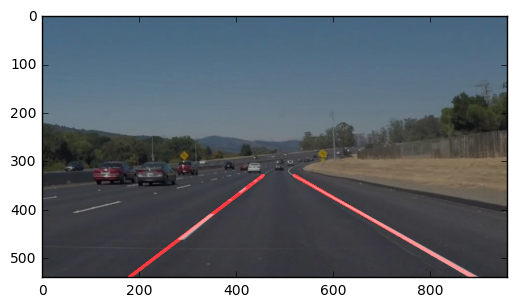

File : out_solidWhiteRight.jpg


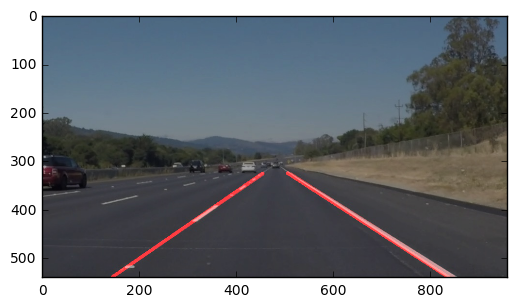

File : out_solidYellowCurve.jpg


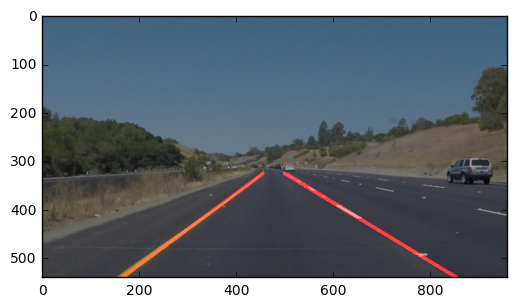

File : out_solidYellowCurve2.jpg


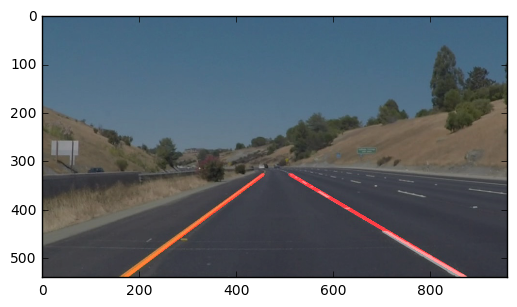

File : out_solidYellowLeft.jpg


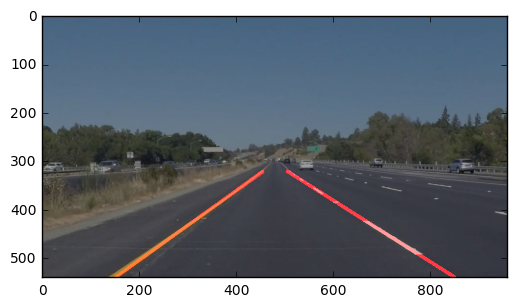

File : out_whiteCarLaneSwitch.jpg


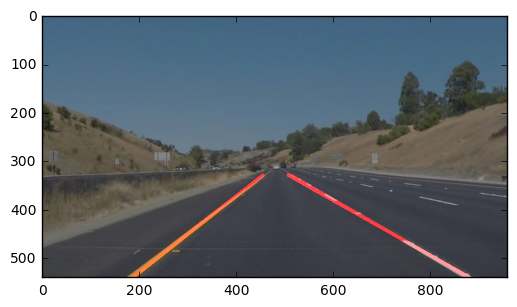

File : solidWhiteCurve.jpg


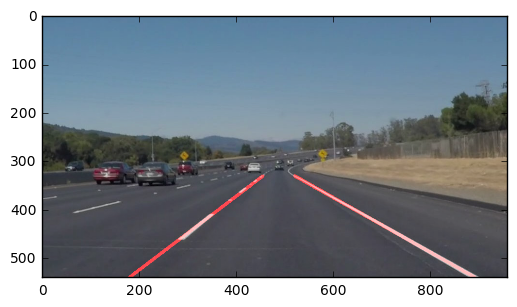

File : solidWhiteRight.jpg


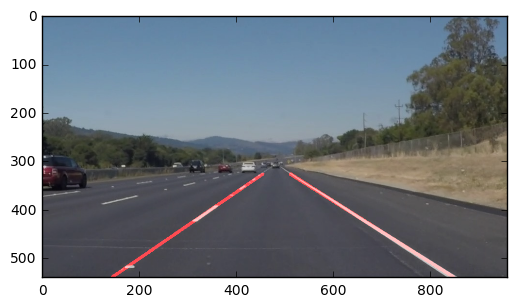

File : solidYellowCurve.jpg


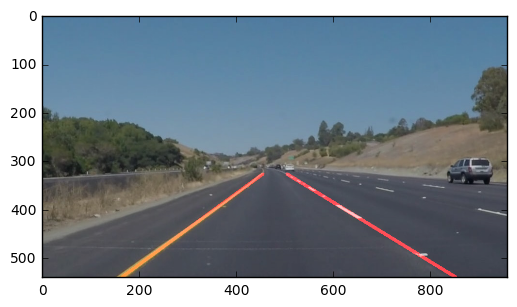

File : solidYellowCurve2.jpg


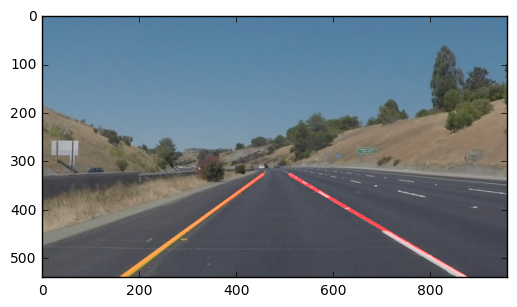

File : solidYellowLeft.jpg


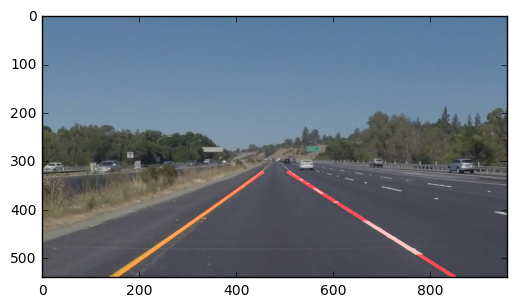

File : whiteCarLaneSwitch.jpg


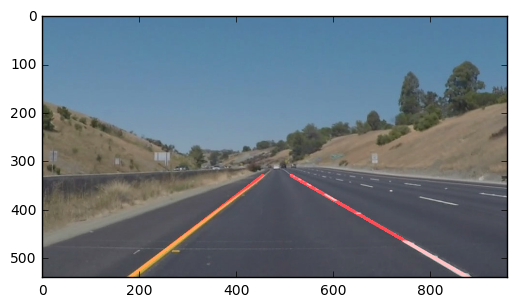

In [7]:
prevLx0 = None
prevLy0 = None
prevRx0 = None
prevRy0 = None

prevLxm = None
prevLym = None
prevRxm = None
prevRym = None

newLineWt = 0.5

def p1Init(nlWt = 0.5):
    global prevLx0
    global prevLy0
    global prevRx0
    global prevRy0

    global prevLxm
    global prevLym
    global prevRxm
    global prevRym

    global newLineWt

    prevLx0 = None
    prevLy0 = None
    prevRx0 = None
    prevRy0 = None

    prevLxm = None
    prevLym = None
    prevRxm = None
    prevRym = None

    newLineWt = nlWt

def drawByFilterLines(lines, img, imgMaxX, imgMaxY):
    newRightLaneLines = []
    newLeftLaneLines = []
    filteredLines = []

    global prevLx0
    global prevLy0
    global prevRx0
    global prevRy0

    global prevLxm
    global prevLym
    global prevRxm
    global prevRym

    if (prevLx0 is not None):
        leftLineSlope = (prevLym - prevLy0)/(prevLxm - prevLx0)
        leftLineC = prevLym - (leftLineSlope * prevLxm)

        rightLineSlope = (prevRym - prevRy0)/(prevRxm - prevRx0)
        rightLineC = prevRym - (rightLineSlope * prevRxm)

    for line in lines:
        for x1,y1,x2,y2 in line:
            slope = (y2 - y1)/(x2 - x1)
            currC = y2 - (slope * x2)

            # if ( -7.6 < slope < -0.5) :
            if ((-5.0 < slope < -0.45) and (x1 < (imgMaxX/2 - 25) ) and (x2 < (imgMaxX/2 - 25) )):

                if (prevLx0 is not None):
                    slopeRatio = slope/leftLineSlope
                    cRatio = currC/leftLineC

                   
                filteredLines.append(line)
                newLeftLaneLines.append([x1, y1])
                newLeftLaneLines.append([x2, y2])

                    # print("L Slope = ", slope, leftLineSlope, slopeRatio, currC, leftLineC, cRatio )
                else:
                    filteredLines.append(line)
                    newLeftLaneLines.append([x1, y1])
                    newLeftLaneLines.append([x2, y2])

            # if ( 0.30 < slope < 0.75) :
            if ( (0.45 < slope < 5.0) and (x1 > (imgMaxX/2 + 25) ) and (x2 > (imgMaxX/2 + 25) )):

                if (prevLx0 is not None):
                    slopeRatio = slope/rightLineSlope
                    cRatio = currC/rightLineC

                    # if ( (slopeRatio >= 0.0) and (slopeRatio < 5.0) and (abs(cRatio) < 3.0)):
                    filteredLines.append(line)
                    newRightLaneLines.append([x1, y1])
                    newRightLaneLines.append([x2, y2])

                    # print("R Slope = ", slope, rightLineSlope, slope/rightLineSlope, currC, rightLineC, currC/rightLineC )
                else:
                    filteredLines.append(line)
                    newRightLaneLines.append([x1, y1])
                    newRightLaneLines.append([x2, y2])

    color = [255, 0, 0]

    ym = None

    # Left Lane
    if (len(newLeftLaneLines) > 1):
        [vx, vy, px, py] = cv2.fitLine(np.array(newLeftLaneLines), cv2.DIST_L2, 0, 0.01, 0.01)

        slope = float (vy / vx)
        c = float (py - (slope * px))

        y0 = imgMaxY
        x0 = int((y0 - c)/slope)

        xm = int ((imgMaxX/2) - 25)
        ym = int( slope * xm + c)

        # print("FitLine :", vx, vy, px, py, " slope, c, x0,,,,:", slope, c, x0, y0, xm, ym)
        if (-5.0 < slope < -0.45):
            # smoothen
            if (prevLx0 is not None):
                x0 = int (x0 * newLineWt + (1 - newLineWt) * prevLx0)
                y0 = int (y0 * newLineWt + (1 - newLineWt) * prevLy0)
                xm = int (xm * newLineWt + (1 - newLineWt) * prevLxm)
                ym = int (ym * newLineWt + (1 - newLineWt) * prevLym)

            prevLx0 = x0
            prevLy0 = y0
            prevLxm = xm
            prevLym = ym

        else:
            # keep prev line as it is
            if (prevLx0 is not None):
                x0 = prevLx0
                y0 = prevLy0
                xm = prevLxm
                ym = prevLym

        cv2.line(img, (x0, y0), (xm, ym), color, 5)

    # Right Lane
    if (len(newRightLaneLines) > 1):
        [vx, vy, px, py] = cv2.fitLine(np.array(newRightLaneLines), cv2.DIST_L2, 0, 0.01, 0.01)

        slope = float (vy / vx)
        c = float (py - (slope * px))

        y0 = imgMaxY
        x0 = int((y0 - c)/slope)

        # xm = int ((imgMaxX/2) + 25)
        # ym = int( slope * xm + c)

        # keep ym same as left line
        if (ym is None):
            ym = prevRym
        xm = int((ym - c) / slope)

        # print("FitLine :", vx, vy, px, py, " slope, c, x0,,,,:", slope, c, x0, y0, xm, ym)
        if (0.45 < slope < 5.0):
            # smoothen
            if (prevRx0 is not None):
                x0 = int (x0 * newLineWt + (1 - newLineWt) * prevRx0)
                y0 = int (y0 * newLineWt + (1 - newLineWt) * prevRy0)
                xm = int (xm * newLineWt + (1 - newLineWt) * prevRxm)
                ym = int (ym * newLineWt + (1 - newLineWt) * prevRym)

            prevRx0 = x0
            prevRy0 = y0
            prevRxm = xm
            prevRym = ym

        else:
            # keep prev line as it is
            x0 = prevRx0
            y0 = prevRy0
            xm = prevRxm
            ym = prevRym

        cv2.line(img, (x0, y0), (xm, ym), color, 5)

    # plt.imshow(img)
    # plt.show()

    return (filteredLines, newLeftLaneLines, newRightLaneLines)


def houghLinesByFiltering(img, rho, theta, threshold, min_line_len, max_line_gap, imgMaxX, imgMaxY):
    """
    custom Hough_line - uses custom draw_line
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    (filteredLines, lLaneLines, rLaneLines) = drawByFilterLines(lines, line_img, imgMaxX, imgMaxY)
    # draw_lines(line_img, filteredLines)

    return line_img


def pipeline(image):
    imgShape = image.shape
    imgMaxX = imgShape[1]
    imgMaxY = imgShape[0]

    gs = grayscale(image)
    gb = gaussian_blur(gs, 5)
    edges = canny(gb, 65, 150)

    mask = np.zeros_like(edges)
    ignore_mask_color = 255

    leftBot = (int(imgMaxX * 0.05), imgMaxY)
    leftTop = (int(imgMaxX * 0.49), int(imgMaxY * 0.59))
    rightTop = (int(imgMaxX * 0.55), int(imgMaxY * 0.59))
    rightBot = (int(imgMaxX * 0.95), imgMaxY)
    vertices = np.array([[leftBot, leftTop, rightTop, rightBot]], dtype=np.int32)

    # masked_edges = cv2.bitwise_and(edges, mask)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_edges = cv2.bitwise_and(edges, mask)

    rho = 1 # distance resolution in pixels of the Hough grid   (1)
    theta = np.pi/180 # angular resolution in radians of the Hough grid
    threshold = 1     # minimum number of votes (intersections in Hough grid cell)  (1)
    min_line_len = 15 #minimum number of pixels making up a line  (25)
    max_line_gap = 10   # maximum gap in pixels between connectable line segments (9)

    maskLineImage = houghLinesByFiltering(masked_edges, rho, theta, threshold, min_line_len, max_line_gap, imgMaxX, imgMaxY)
    # lines_edges = cv2.addWeighted(image, 0.8, maskLineImage, 1, 0)
    lines_edges = weighted_img(maskLineImage, image)
    return lines_edges


files = os.listdir("test_images/")
for file in files:
    if (file != "ttt"):
        p1Init()
        image = mpimg.imread("test_images/" + file)
        lines_edges = pipeline(image)

        print("File :", file)
        mpimg.imsave("test_images/out_" + file, lines_edges)

        plt.imshow(lines_edges)
        plt.show()

In [8]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [9]:
def process_image(image):
    result = pipeline(image)
    return result

In [10]:
p1Init()
white_output = 'white.mp4'
clip1 = VideoFileClip("solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video white.mp4
[MoviePy] Writing video white.mp4


100%|█████████▉| 221/222 [00:02<00:00, 88.94it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: white.mp4 

CPU times: user 2.09 s, sys: 633 ms, total: 2.72 s
Wall time: 2.86 s


In [11]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))